# Import Packages


In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,  auc, roc_auc_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from typing import List, Dict
from random import choices
from sklearn.feature_selection import VarianceThreshold
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import KFold
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

%matplotlib inline



# Part #1: Exploring the data

In [2]:
warnings.filterwarnings('ignore')
data = pd.read_csv("train.csv")

data

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,...,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,...,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,...,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,10474,3.0,145.0,0.0,0.0 minutes,53.0,1783.791667 minutes,1928.791667,0.007143,0.029031,...,4.0,browser_6_v12,1.0,Returning_Visitor,True,c_1,79.548460,log400,NaN,0
10475,10475,0.0,0.0,0.0,0.0 minutes,5.0,465.75 minutes,NaN,0.000000,0.021333,...,3.0,chrome_98.0.1,1.0,Returning_Visitor,True,c_8,99.457255,log202,NaN,0
10476,10476,0.0,0.0,0.0,0.0 minutes,6.0,184.25 minutes,NaN,0.083333,0.086667,...,3.0,chrome_99.1.3,1.0,Returning_Visitor,True,c_13,94.417344,log8080,NaN,0
10477,10477,4.0,75.0,0.0,0.0 minutes,15.0,346.0 minutes,NaN,0.000000,0.021053,...,2.0,chrome_80,3.0,Returning_Visitor,False,c_11,108.919057,log400,NaN,0


We can see from the snapshot on the data that we have some features that may be irrelevant, and mostly NaN values in D.
Also, we will check how many NaN values we have in each feature, it will help us later on to decide how to fill them, or maybe even discard some of them. <br> In addition, some features that have a numeric values but are string, we will convert now.

Let's check it out!

In [3]:
def first_process(data):
    #remove 'minutes'
    data['info_page_duration'] = data['info_page_duration'].str.replace('minutes', "")
    data['product_page_duration'] = data['info_page_duration'].str.replace('minutes', "")

    #convert the values to numeral
    data['info_page_duration'] = data['info_page_duration'].astype(float)
    data['product_page_duration'] = data['product_page_duration'].astype(float)
    data['Weekend'] = data['Weekend'].replace({False: 0,True:1})

    return data

data = first_process(data)

In [4]:
D_Nans = data['D'].isna().sum() / len(data)
print(f'D NA percentage: {D_Nans}')

D NA percentage: 0.9899799599198397


The D feature is mostly NaN we will remove it later on.


We would like to see also the precentage of purchases from the total amount of recorded users so that we can understand whether the numbers we get in the features inspection are negligible.
We whould like to plot the numeric features to have a better understanding on them.

In [5]:
purch_lst = list(data['purchase'].value_counts())
total_purch = purch_lst[1]/len(data)

all_features = data.columns
numeric_features = data.select_dtypes(include=[np.number]).columns
cat_cols = list(set(all_features) - set(numeric_features))

print(f'Total Purchase precentage: {total_purch}\nCategorial features: {cat_cols}')

Total Purchase precentage: 0.15469033304704646
Categorial features: ['C', 'user_type', 'Month', 'internet_browser', 'A']


We can see the total purchases are 15%, and that we have several features that we need to convert to numeric.
Also, we see that we have some categorial features. We want to have a quick look to examine reather each one of the categories in those feature has an indevidual impact, or maybe they can be grouped together.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'num_of_admin_pages'}>,
        <AxesSubplot:title={'center':'admin_page_duration'}>,
        <AxesSubplot:title={'center':'num_of_info_pages'}>],
       [<AxesSubplot:title={'center':'info_page_duration'}>,
        <AxesSubplot:title={'center':'num_of_product_pages'}>,
        <AxesSubplot:title={'center':'product_page_duration'}>,
        <AxesSubplot:title={'center':'total_duration'}>],
       [<AxesSubplot:title={'center':'BounceRates'}>,
        <AxesSubplot:title={'center':'ExitRates'}>,
        <AxesSubplot:title={'center':'PageValues'}>,
        <AxesSubplot:title={'center':'closeness_to_holiday'}>],
       [<AxesSubplot:title={'center':'device'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'Weekend'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'D'}>,
        <AxesSubplot:title={'center':'purchase'}>, <AxesSubplot:>

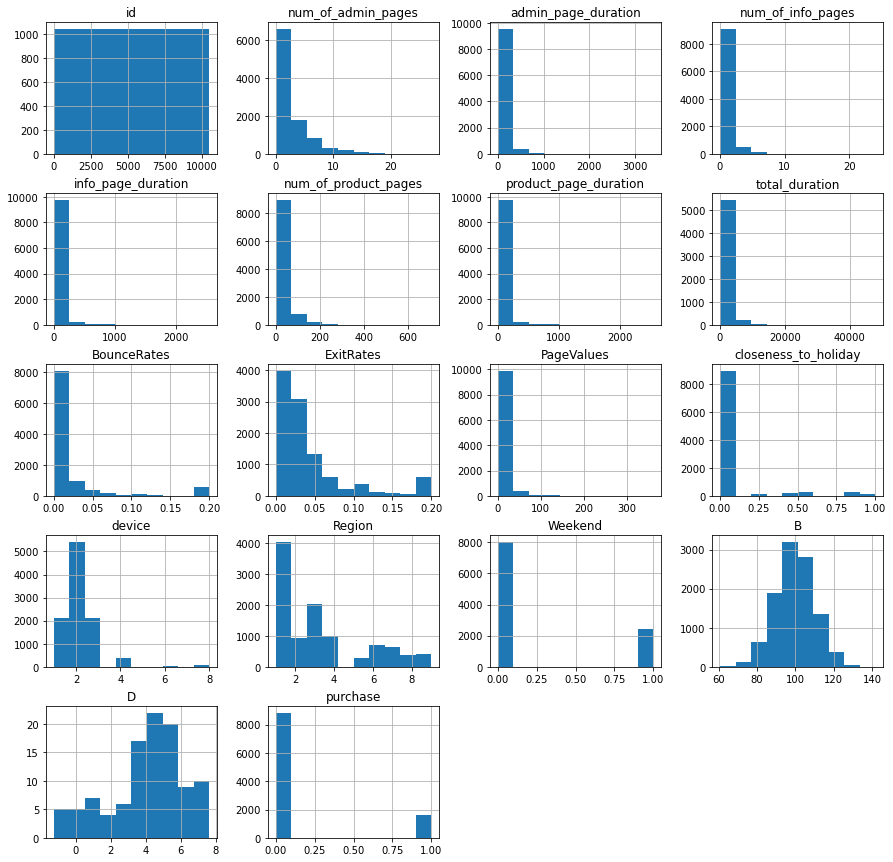

In [6]:
data.iloc[:,:].hist(figsize=(15,15))

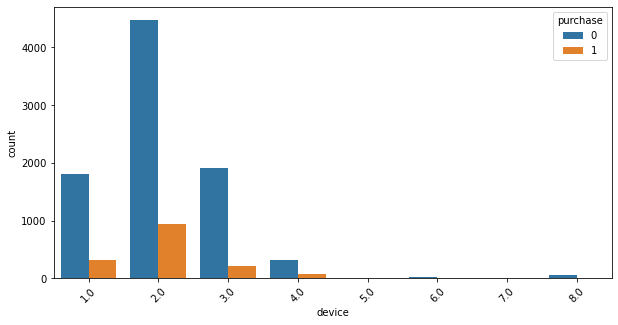

2.0    5429
1.0    2130
3.0    2120
4.0     388
8.0      64
6.0      18
5.0       4
7.0       3
Name: device, dtype: int64

In [7]:
plt.figure(figsize=(10,5))
use_type = sns.countplot(x='device',hue='purchase' , data=data)
plt.xticks(rotation=45)
plt.show()
data['device'].value_counts()

As we can see the values above 4 are significatlly lower then the rest. Later on we will set all of those values as '4'

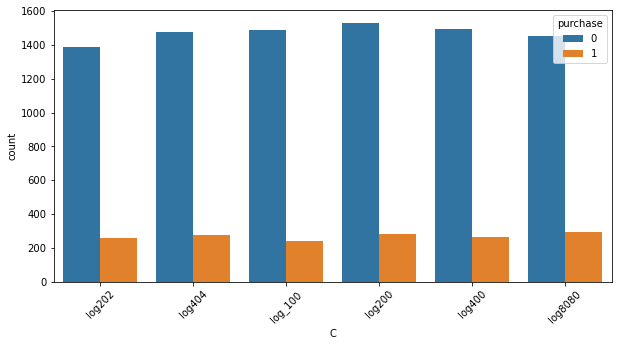

log200     1813
log400     1760
log404     1754
log8080    1748
log_100    1731
log202     1650
Name: C, dtype: int64

In [8]:
plt.figure(figsize=(10,5))
use_type = sns.countplot(x='C',hue='purchase' , data=data)
plt.xticks(rotation=45)
plt.show()
data['C'].value_counts()

We see that column 'c' distribute uniformly, and it seems that this feature will not add much for our models. We will drop this column later. <br> 

As we saw before, in order to make insights on feature 'A' we need to remove 'c_' & '_'.

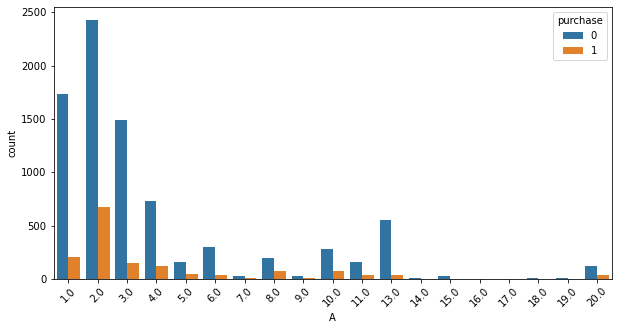

2.0     3101
1.0     1944
3.0     1644
4.0      850
13.0     586
10.0     347
6.0      335
8.0      268
5.0      205
11.0     199
20.0     162
7.0       34
9.0       32
15.0      31
19.0      14
14.0      10
18.0       7
16.0       3
17.0       1
Name: A, dtype: int64

In [9]:
def A_process(data):
    data['A'] = data['A'].str.replace('c_', "")
    A_col = data['A']
    for i in range(len(A_col)):
        if str(A_col[i]).startswith('20'):
            data['A'][i] = '20'
    data['A'] = data['A'].astype(float)
    return data

data = A_process(data)

plt.figure(figsize=(10,5))
use_type = sns.countplot(x='A',hue='purchase' , data=data)
plt.xticks(rotation=45)
plt.show()
data['A'].value_counts()

It's hard to determain at this point what is the right way to deal with this feature according to the plot. We want to check how likely it is to end a session as 'purchase' for each category, according to our data.

In [10]:
A_dict = {1.0:0, 2.0:0, 3.0:0, 4.0:0, 5.0:0, 6.0:0, 7.0:0, 8.0:0, 9.0:0, 10.0:0, 11.0:0, 13.0:0, 14.0:0, 15.0:0, 16.0:0, 17.0:0, 18.0:0, 19.0:0, 20.0:0}
A_count = {1.0:0, 2.0:0, 3.0:0, 4.0:0, 5.0:0, 6.0:0, 7.0:0, 8.0:0, 9.0:0, 10.0:0, 11.0:0, 13.0:0, 14.0:0, 15.0:0, 16.0:0, 17.0:0, 18.0:0, 19.0:0, 20.0:0}

for a in range(1,len(data['A'])-1):
    curr_a = data['A'][a]
    if  pd.isna(curr_a):
        continue
    else:
        A_count[curr_a] += 1
        if data['purchase'][a] == 1:
            A_dict[curr_a] += 1
per_lst =[]
for i in A_dict.keys():
    pur_per = 100*(A_dict[i] / A_count[i])
    A_dict[i] = pur_per
    per_lst.append(pur_per)
    print(f'Total Purchase precentage in {i} is: {pur_per}')
print(f'The average purchased percentage per A category is: {sum(per_lst)/len(per_lst)}')

Total Purchase precentage in 1.0 is: 10.80802882141019
Total Purchase precentage in 2.0 is: 21.70967741935484
Total Purchase precentage in 3.0 is: 9.063260340632603
Total Purchase precentage in 4.0 is: 14.470588235294118
Total Purchase precentage in 5.0 is: 22.926829268292686
Total Purchase precentage in 6.0 is: 11.343283582089553
Total Purchase precentage in 7.0 is: 32.35294117647059
Total Purchase precentage in 8.0 is: 27.611940298507463
Total Purchase precentage in 9.0 is: 12.5
Total Purchase precentage in 10.0 is: 20.172910662824208
Total Purchase precentage in 11.0 is: 18.090452261306535
Total Purchase precentage in 13.0 is: 6.143344709897611
Total Purchase precentage in 14.0 is: 20.0
Total Purchase precentage in 15.0 is: 0.0
Total Purchase precentage in 16.0 is: 33.33333333333333
Total Purchase precentage in 17.0 is: 0.0
Total Purchase precentage in 18.0 is: 0.0
Total Purchase precentage in 19.0 is: 7.142857142857142
Total Purchase precentage in 20.0 is: 25.308641975308642
The av

We have two insights:<br>1. From the intial plot, we saw some features that appear a very small amount of times (14, 16, 17, 18, 19). We will delete these rows later.<br> 2. We will devide this feature into 3 categories:<br> 0-10% as 'weak'<br> 10-20% as 'average'<br> 20% and above as 'strong'.

Groups precentage in the data: <br>Group 'weak'- A = 3, 13, 15 (2261 - 22%)<br> Group 'average'- A = 1, 4, 6, 9, 11 (3360 - 33%)<br> Group 'strong'- A = 2, 5, 7, 8, 10, 20 (4117 - 39%) <br> Nan values = 6%

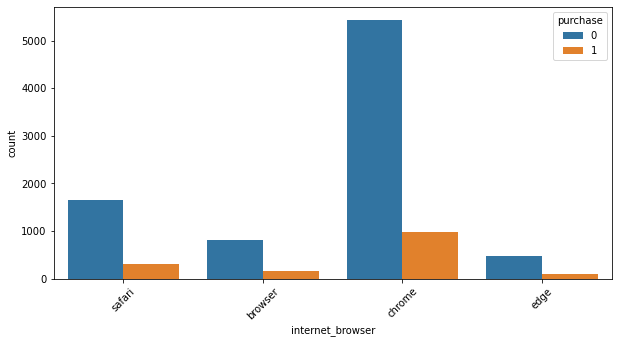

chrome     6419
safari     1952
browser     957
edge        588
Name: internet_browser, dtype: int64

In [11]:
def browser_process(data):
    brow_col = data['internet_browser']
    for i in range(len(brow_col)):
        if str(brow_col[i]).startswith('browser'):
            data['internet_browser'][i] = 'browser'
        elif str(brow_col[i]).startswith('chrome'):
            data['internet_browser'][i] = 'chrome'
        elif str(brow_col[i]).startswith('safari'):
            data['internet_browser'][i] = 'safari'
        elif str(brow_col[i]).startswith('edge'):
            data['internet_browser'][i] = 'edge'
    return data

data = browser_process(data)
plt.figure(figsize=(10,5))
browser = sns.countplot(x='internet_browser',hue='purchase' , data=data)
plt.xticks(rotation=45)
plt.show()
data['internet_browser'].value_counts()


According the plot, it is not clear rather internet browser has any significant meaning.<br> We will investigate it more thoroughly by examining each browser purchase percentage:

In [12]:
br_dict = {'chrome':0, 'safari':0, 'browser':0, 'edge':0}
br_count = {'chrome':0, 'safari':0, 'browser':0, 'edge':0}

for b in range(1,len(data['internet_browser'])-1):
    curr_br = data['internet_browser'][b]
    if isinstance(curr_br,str):      
        br_count[curr_br] += 1
        if data['purchase'][b] == 1:
            br_dict[curr_br] += 1
per_lst =[]
for i in br_dict.keys():
    pur_per = 100*(br_dict[i] / br_count[i])
    br_dict[i] = pur_per
    per_lst.append(pur_per)
    print(f'Total Purchase precentage in {i} is: {pur_per}')
print(f'The average purchased percentage per browser is: {sum(per_lst)/len(per_lst)}')

Total Purchase precentage in chrome is: 15.331879090059209
Total Purchase precentage in safari is: 15.376729882111736
Total Purchase precentage in browser is: 16.091954022988507
Total Purchase precentage in edge is: 18.197278911564627
The average purchased percentage per browser is: 16.24946047668102


It looks like the four different browser has no significant impact!<br> We will drop this feature later.

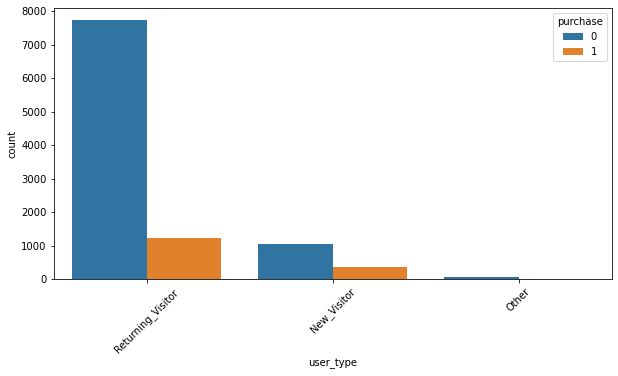

Returning_Visitor    8956
New_Visitor          1428
Other                  72
Name: user_type, dtype: int64

In [13]:
plt.figure(figsize=(10,5))
use_type = sns.countplot(x='user_type',hue='purchase' , data=data)
plt.xticks(rotation=45)
plt.show()
data['user_type'].value_counts()

The meanning of 'Other' category in 'user_type' is not so clear, and also we see that there are very few of them. We will transform this values to Returning_Visitor later (vast majority).

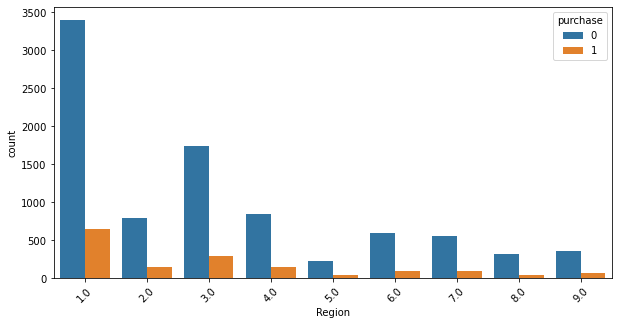

1.0    4056
3.0    2044
4.0     996
2.0     940
6.0     695
7.0     655
9.0     431
8.0     369
5.0     274
Name: Region, dtype: int64

In [14]:
plt.figure(figsize=(10,5))

months = sns.countplot(x='Region',hue='purchase' , data=data)
plt.xticks(rotation=45)
plt.show()
data['Region'].value_counts()

It looks like the 'Region' feature might have a indevidual impact on the purchase percentage. We will turn it into dummy variable later on.

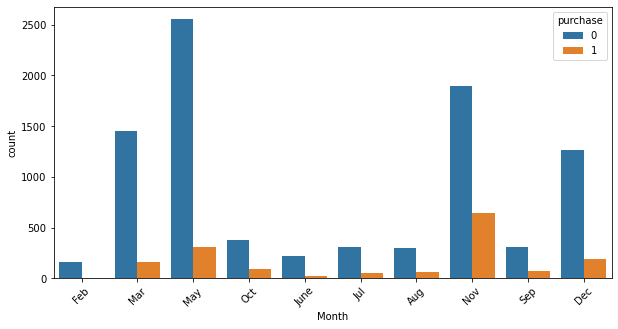

In [15]:
plt.figure(figsize=(10,5))

months = sns.countplot(x='Month',hue='purchase' , data=data)
plt.xticks(rotation=45)
plt.show()


At first glimps on the monthes distribution from our data, we see that: <br> 1. there is no documentation for entries on January and April to the website.<br> 2. it appears that there are some monthes that have a higher purchase rate then other. This is somthing that we will take under consideration.

In [16]:
purch_dict = {'Feb':0, 'Mar':0, 'May':0, 'June':0, 'Jul':0, 'Aug':0, 'Sep':0, 'Oct':0, 'Nov':0, 'Dec':0}
month_count = {'Feb':0, 'Mar':0, 'May':0, 'June':0, 'Jul':0, 'Aug':0, 'Sep':0, 'Oct':0, 'Nov':0, 'Dec':0}

for m in range(1,len(data['Month'])-1):
    curr_month = data['Month'][m]
    if isinstance(curr_month,str):      
        month_count[curr_month] += 1
        if data['purchase'][m] == 1:
            purch_dict[curr_month] += 1
per_lst =[]
for i in purch_dict.keys():
    pur_per = 100*(purch_dict[i] / month_count[i])
    purch_dict[i] = pur_per
    per_lst.append(pur_per)
    print(f'Total Purchase precentage in {i} is: {pur_per}')
print(f'The average purchased percentage per month is: {sum(per_lst)/len(per_lst)}')


Total Purchase precentage in Feb is: 1.8518518518518516
Total Purchase precentage in Mar is: 9.969040247678018
Total Purchase precentage in May is: 10.745537276863844
Total Purchase precentage in June is: 10.080645161290322
Total Purchase precentage in Jul is: 14.713896457765669
Total Purchase precentage in Aug is: 17.534246575342465
Total Purchase precentage in Sep is: 19.525065963060687
Total Purchase precentage in Oct is: 20.59447983014862
Total Purchase precentage in Nov is: 25.374310480693456
Total Purchase precentage in Dec is: 12.96551724137931
The average purchased percentage per month is: 14.335459108607424


We can see that the average purchase percentage per month is 14.335%. We will round it up (15%), and use this as a theshold to categorize and combine the months that are above the average as "strong months" (1), and "average months" (0).   

## Outliers

Based on the histograms we made before, we will check the sum of the data outliers. In case the outlier data is not a significant part of the data we will remove it.<br>
For a start, although only features 'B' and 'Region' destribute normally we will try and find outliers with BoxPlot and the 1.5 IQR rule for each numerical feature, based on the Central Limit Theorem.

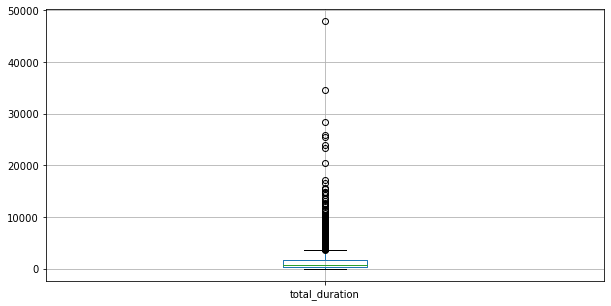

For feature: total_duration
 iqr = total_duration    1384.733333
dtype: float64
 upper_bound= total_duration    3682.833333
dtype: float64
 lower_bound = total_duration   -1856.1
dtype: float64 


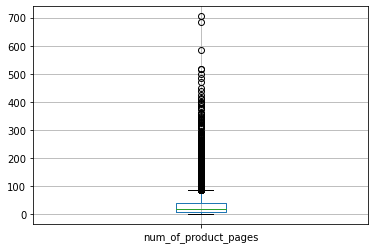

For feature: num_of_product_pages
 iqr = num_of_product_pages    31.0
dtype: float64
 upper_bound= num_of_product_pages    84.5
dtype: float64
 lower_bound = num_of_product_pages   -39.5
dtype: float64 


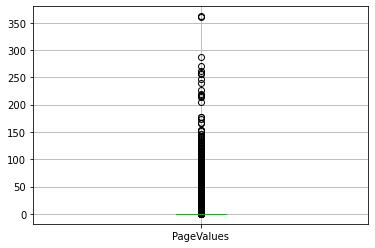

For feature: PageValues
 iqr = PageValues    0.0
dtype: float64
 upper_bound= PageValues    0.0
dtype: float64
 lower_bound = PageValues    0.0
dtype: float64 


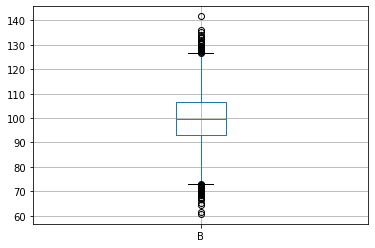

For feature: B
 iqr = B    13.476058
dtype: float64
 upper_bound= B    126.720713
dtype: float64
 lower_bound = B    72.816481
dtype: float64 


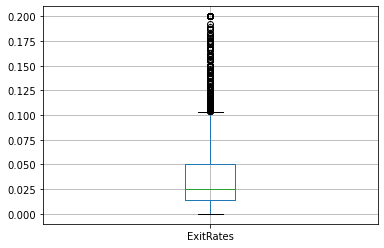

For feature: ExitRates
 iqr = ExitRates    0.035717
dtype: float64
 upper_bound= ExitRates    0.103575
dtype: float64
 lower_bound = ExitRates   -0.039291
dtype: float64 


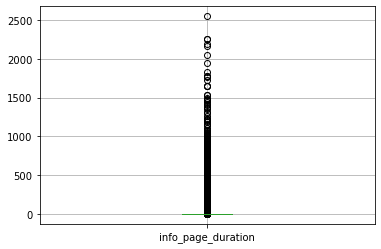

For feature: info_page_duration
 iqr = info_page_duration    0.0
dtype: float64
 upper_bound= info_page_duration    0.0
dtype: float64
 lower_bound = info_page_duration    0.0
dtype: float64 


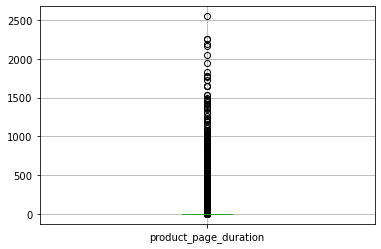

For feature: product_page_duration
 iqr = product_page_duration    0.0
dtype: float64
 upper_bound= product_page_duration    0.0
dtype: float64
 lower_bound = product_page_duration    0.0
dtype: float64 


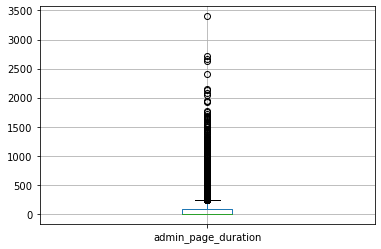

For feature: admin_page_duration
 iqr = admin_page_duration    93.0
dtype: float64
 upper_bound= admin_page_duration    232.5
dtype: float64
 lower_bound = admin_page_duration   -139.5
dtype: float64 


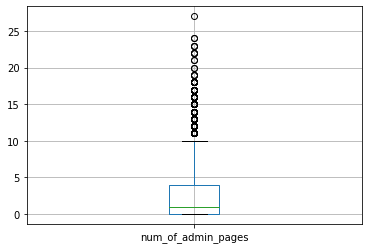

For feature: num_of_admin_pages
 iqr = num_of_admin_pages    4.0
dtype: float64
 upper_bound= num_of_admin_pages    10.0
dtype: float64
 lower_bound = num_of_admin_pages   -6.0
dtype: float64 


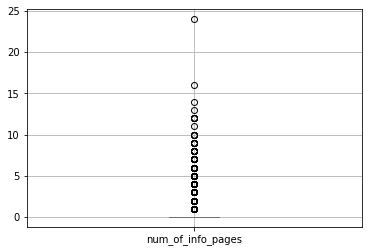

For feature: num_of_info_pages
 iqr = num_of_info_pages    0.0
dtype: float64
 upper_bound= num_of_info_pages    0.0
dtype: float64
 lower_bound = num_of_info_pages    0.0
dtype: float64 


In [17]:
bxplt_lst = ['total_duration','num_of_product_pages', 'PageValues', 'B', 'ExitRates', 'info_page_duration', 'product_page_duration', 'admin_page_duration', 'num_of_admin_pages', 'num_of_info_pages']
plt.figure(figsize=(10,5))
for col in bxplt_lst:
    q1, q3, med, iqr, upper_bound, lower_bound = 0,0,0,0,0,0
    
    data[[col]].boxplot()
    plt.show()
    
    # finding the 1st quartile
    q1 = data[[col]].quantile(0.25)

    # finding the 3rd quartile
    q3 = data[[col]].quantile(0.75)
    med = data[[col]].median()

    # finding the iqr region
    iqr = q3-q1

    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    print(f'For feature: {col}\n iqr = {iqr}\n upper_bound= {upper_bound}\n lower_bound = {lower_bound} ')

Except feature 'B', we got very bizarre and illogical upper & lower bounds.<br> We will use the upper & lower bounds that we got for feature 'B' (127 and 73), and find thresholds for the rest of the features manually. We will try to find thresholds that will remove no more then 1-2% of the data. <br> We have some speculations regarding features 'total_duration' & 'BounceRates' so we wait with them for now.

In [18]:
outl_nopp = data['num_of_product_pages'] > 200
print("num of product pages outliers sum: ", outl_nopp.sum())

outl_pv = data['PageValues'] > 85
print("page values outliers sum: ", outl_pv.sum())

outl_ut = data['user_type'] == 'Other'
print("user type outliers sum: ", outl_ut.sum())

outl_er = data['ExitRates'] < 0.001
print("Exit rates outliers sum: ", outl_er.sum())

outl_ipd = data['info_page_duration'] > 550
print("Info page duration outliers sum: ", outl_ipd.sum())

outl_ppd = data['product_page_duration'] > 750
print("Product page duration outliers sum: ", outl_ppd.sum())

outl_apd = data['admin_page_duration'] > 1000
print("Admin page duration outliers sum: ", outl_apd.sum())

outl_noap = data['num_of_admin_pages'] > 14
print("Num of admin pages outliers sum: ", outl_noap.sum())

outl_noip = data['num_of_info_pages'] > 7
print("Num of info pages outliers sum: ", outl_noip.sum())

outl_B = (data['B'] >= 127) | (data['B'] <= 73)
print("B outliers sum: ", outl_B.sum())

num of product pages outliers sum:  126
page values outliers sum:  104
user type outliers sum:  72
Exit rates outliers sum:  88
Info page duration outliers sum:  141
Product page duration outliers sum:  95
Admin page duration outliers sum:  70
Num of admin pages outliers sum:  95
Num of info pages outliers sum:  35
B outliers sum:  75


As we can see the outliers data rows are insignificant and it will not harm the data if we will remove it. Lets do it.<br>We will split 'A' to groups as we mentioned before

In addition and as mentioned before, we will now remove the following columns: 'Id', 'D', 'C', 'internet_browser'. 
We will handle the 'month' & 'device' features as mentioned before.


In [19]:
def remove_outliers(data):

    # remove B outliers values >= 127 or values <= 73
    # based on our 1.5 iqr rule
    data.drop(data[(data['B'] >= 127) | (data['B'] <= 73)].index, inplace = True)
    
    #remove num_of_product_pages values > 200
    data.drop(data[data['num_of_product_pages'] > 200].index, inplace = True)

    #remove PageValues values > 85
    data.drop(data[data['PageValues'] > 85].index, inplace = True)

    #remove Exit rates values < 0.001
    data.drop(data[data['ExitRates'] < 0.001].index, inplace = True)

    #remove info page duration values > 550
    data.drop(data[data['info_page_duration'] > 550].index, inplace = True)

    #remove product page duration values > 750
    data.drop(data[data['product_page_duration'] > 750].index, inplace = True)

    #remove admin page duration > 1000
    data.drop(data[data['admin_page_duration'] > 1000].index, inplace = True)

    #remove num of admin page duration > 14
    data.drop(data[data['num_of_admin_pages'] > 14].index, inplace = True)
    
    #remove num of info pages  > 7
    data.drop(data[data['num_of_info_pages'] > 7].index, inplace = True)

    # Column 'A'
    data.drop(data[data['A'] == 14.0].index, inplace = True)
    data.drop(data[data['A'] == 16.0].index, inplace = True)
    data.drop(data[data['A'] == 17.0].index, inplace = True)
    data.drop(data[data['A'] == 18.0].index, inplace = True)
    data.drop(data[data['A'] == 19.0].index, inplace = True)

    return data

def drop_process(data):
    
    data.drop('C', inplace=True, axis=1)
    data.drop('D', inplace=True, axis=1)
    data.drop('id', inplace=True, axis=1)
    data.drop('internet_browser', inplace=True, axis=1)

    #Months
    data['Month'] = data['Month'].replace({'Feb':0, 'Mar':0, 'May':0, 'June':0, 'Jul':0, 'Aug':1, 'Sep':1, 'Oct':1, 'Nov':1, 'Dec':0})

    # Column 'device'
    data.loc[data["device"] > 4, "device"] = 4

    return data

data = remove_outliers(data)
data = drop_process(data)

## Filling in missing values

For a start, lets have a look on our missing values:

In [20]:
Nans = data.isnull().sum()
Nans[Nans>0]

num_of_admin_pages        567
admin_page_duration       394
num_of_info_pages         632
info_page_duration        294
num_of_product_pages      377
product_page_duration     294
total_duration           4454
BounceRates                20
ExitRates                  25
PageValues                 27
closeness_to_holiday      470
Month                      24
device                    306
Region                     18
user_type                  22
Weekend                    22
A                         671
B                          23
dtype: int64

Based on our understanding of the data so far, We will fill in some of the missing values in the data as follows: <br>1. 'B' that seems to be distrebuting normaly, with the mean value of the feature.<br> 2. 'num of info pages', 'info page duration', 'num of product pages' and 'exit rate'  we will fiil with the mean value, based on the histogram we presented before. <br>3. 'device', 'Region', 'closeness to holiday', 'num_of_admin_pages', 'admin page duration', 'product page duration'  and 'page values' with median value. <br>4. 'user_type' Nans as Returning_Visitor, 'Weekend' to 0 (vast majority) <br> 5. 'Months' as "average months" (0).<br> 6. 'A' with respect to the weight of each category.

In [21]:
# stats to use for NA filling
##means   
B_mean = data['B'].mean()
num_inf_pg = data['num_of_info_pages'].mean()
inf_pg_dr = data['info_page_duration'].mean()
num_pr_pg = data['num_of_product_pages'].mean()
ex_rt = data['ExitRates'].mean()
##medians
holiday = data['closeness_to_holiday'].median()
device = data['device'].median()
region = data['Region'].median()
ad_pg = data['num_of_admin_pages'].median()
ad_pg_dr = data['admin_page_duration'].median()
pr_pg_dr = data['product_page_duration'].median()
pg_val = data['PageValues'].median()

## A by weights
A_dict = {3:'w',13:'w', 15:'w', 1:'av', 4:'av', 6:'av', 9:'av', 11:'av', 2:'s', 5:'s', 7:'s', 8:'s', 10:'s', 20:'s'}
data['A'] = data['A'].replace(A_dict)
data['A'] = data['A'].fillna(0)

def fill_na(data):
    # Mean
    data['B'] = data['B'].fillna(B_mean)
    data['num_of_info_pages'] = data['num_of_info_pages'].fillna(num_inf_pg)
    data['info_page_duration'] = data['info_page_duration'].fillna(inf_pg_dr)
    data['num_of_product_pages'] = data['num_of_product_pages'].fillna(num_pr_pg)
    data['ExitRates'] = data['ExitRates'].fillna(ex_rt)

    # Median
    data['closeness_to_holiday'] = data['closeness_to_holiday'].fillna(holiday)
    data['device'] = data['device'].fillna(device)
    data['Region'] = data['Region'].fillna(region)
    data['num_of_admin_pages'] = data['num_of_admin_pages'].fillna(ad_pg)
    data['admin_page_duration'] = data['admin_page_duration'].fillna(ad_pg_dr)
    data['product_page_duration'] = data['product_page_duration'].fillna(pr_pg_dr)
    data['PageValues'] = data['PageValues'].fillna(pg_val)

    # Vast majority
    data['user_type'] = data['user_type'].fillna('Returning_Visitor')
    data['Weekend'] = data['Weekend'].fillna(0.0)

    # Months
    data['Month'] = data['Month'].fillna(0)

    # A by weights
    A_lst = ['w','av', 's']
    count_a = 0
    for a in data['A']:
        if a == 0:
            fill_a = random.choices(A_lst,[0.24, 0.37, 0.39,], k=1)
            data['A'][count_a] = fill_a[0]
        count_a += 1
    
    return data

data = fill_na(data)

Nans = data.isnull().sum()
Nans[Nans>0]

total_duration    4454
BounceRates         20
dtype: int64

We have left with 'total duration' and 'bounce rate' that still have missing value. We will examine the correlation table, and might have some insights:

<AxesSubplot:>

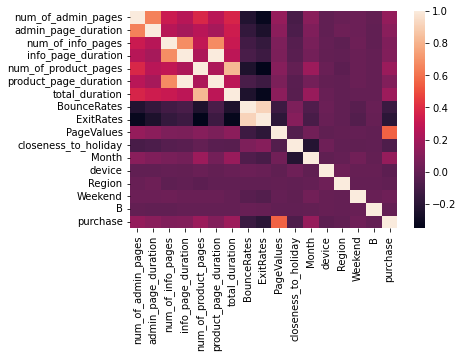

In [22]:
corr = data.corr()
sns.heatmap(corr)


In [23]:
corr = data.corr()
corr.style.background_gradient(cmap='YlOrRd').set_precision(2)


,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,Month,device,Region,Weekend,B,purchase
num_of_admin_pages,1.00,0.64,0.32,0.26,0.38,0.26,0.37,-0.23,-0.32,0.15,-0.10,0.11,-0.01,0.01,0.02,-0.01,0.14
admin_page_duration,0.64,1.00,0.26,0.20,0.26,0.20,0.33,-0.17,-0.25,0.12,-0.08,0.08,-0.01,0.03,0.02,-0.01,0.12
num_of_info_pages,0.32,0.26,1.00,0.68,0.29,0.68,0.32,-0.12,-0.17,0.08,-0.05,0.06,-0.00,-0.02,0.03,-0.01,0.09
info_page_duration,0.26,0.20,0.68,1.00,0.23,1.00,0.27,-0.09,-0.13,0.07,-0.04,0.05,-0.00,-0.01,0.02,-0.00,0.09
num_of_product_pages,0.38,0.26,0.29,0.23,1.00,0.23,0.82,-0.25,-0.35,0.11,-0.01,0.17,0.01,-0.03,0.02,-0.00,0.17
product_page_duration,0.26,0.20,0.68,1.00,0.23,1.00,0.27,-0.09,-0.13,0.07,-0.04,0.05,-0.00,-0.01,0.02,-0.00,0.09
total_duration,0.37,0.33,0.32,0.27,0.82,0.27,1.00,-0.24,-0.33,0.12,-0.04,0.16,0.01,-0.01,-0.00,-0.00,0.18
BounceRates,-0.23,-0.17,-0.12,-0.09,-0.25,-0.09,-0.24,1.00,0.91,-0.13,0.08,-0.07,0.02,-0.01,-0.04,0.01,-0.14
ExitRates,-0.32,-0.25,-0.17,-0.13,-0.35,-0.13,-0.33,0.91,1.00,-0.19,0.10,-0.10,0.01,-0.01,-0.06,0.01,-0.20
PageValues,0.15,0.12,0.08,0.07,0.11,0.07,0.12,-0.13,-0.19,1.00,-0.06,0.04,-0.02,-0.01,-0.00,-0.01,0.55


Few insights from the corr table: 
1. Exit rates and bounce rates have almost perfect correlation (0.91!) - we will remove bounce rates and will remain with exit rates
2. As we have seen before total_duration NaN values are 4605, almost 50% of the data! in addition the correlation of the value to num of of product pages is 82% which is high. We will remove total_duration as well. 
3. We can see that page value may be a good predictor to purchase.. we'll keep an eye on this one. 

In addition, we still have some categorial variables - we will turn them into dummies.


In [24]:
def dummies(data):
    data.drop('total_duration', inplace=True, axis=1)
    data.drop('BounceRates', inplace=True, axis=1)
    
    data.loc[data["user_type"] == "Returning_Visitor", "user_type"] = 0
    data.loc[data["user_type"] == "Other", "user_type"] = 0
    data.loc[data["user_type"] == "New_Visitor", "user_type"] = 1

    data = pd.get_dummies(data, prefix=['A'], columns=['A'])
    data = pd.get_dummies(data, prefix=['device'], columns=['device'])
    data = pd.get_dummies(data, prefix=['Region'], columns=['Region'])
    
    return data
    
data = dummies(data)

## Normalization

Right before we start selecting our features and building our models, we would like to normalize our entire data. <br> Normalizing the data is important so that we can have the same scale for all our features without distorting differences in the ranges of values or losing information. <br> In addition, we will make sure that all of our features are a numeric type.

In [25]:
def normalize(data):    
    data = (data - data.min())/(data.max() - data.min())
    data = data.astype(float)
    return data
data = normalize(data)

## 2. Feature selection - finally we can start working

In [26]:
print('Number of features before feature selection: ',data.shape[1])

Number of features before feature selection:  31


We can see that we have a big dimensionality at the moment. Big problem dimensionality may lead to overfitting and long running times. In addition it drops the reduntant and irrelevant features and leaves us with most important features for the prediction. 

In [27]:
ordered_cols = [x for x in data.columns if x not in['purchase']] + ['purchase']
data = data[ordered_cols]

We will use fw feature selection algorythm:

In [28]:
def get_sigma_hat_squared(X: np.array, y: np.array) -> float:
   
    lm = LinearRegression()
    lm.fit(X,y)
    n = X.shape[0]
    d = X.shape[1]
    mse = mean_squared_error(y,lm.predict(X))
    RSS = mse*n
    return RSS/(n-d-1)

def get_mallows_cp_score(X: np.array ,y: np.array, sigma_hat_squared: float) -> float:

    lm = LinearRegression()
    lm.fit(X,y)
    n = X.shape[0]
    d = X.shape[1]
    mse = mean_squared_error(y,lm.predict(X))
    return (mse + (2*sigma_hat_squared*(d+1))/n) 

def add_feature(X: np.array ,y: np.array ,current_features: List[int] , sigma_hat_squared: float) -> Dict:

    best_features_lst = None
    best_score = None
    curr_index = None
    feature_dict = {}
    
    for f in range(X.shape[1]):
        temp_lst = current_features[:]
        if f not in temp_lst:
            temp_lst.append(f)
            cp = get_mallows_cp_score(X[:,temp_lst], y, sigma_hat_squared)
            feature_dict[cp] = temp_lst
            
    best_score = min(feature_dict)
    best_features_lst = feature_dict[best_score]
    return {'features':sorted(best_features_lst),'score':best_score} 

def forward_selection(X: np.array, y: np.array) -> List[int]:

    num_of_features = X.shape[1]
    current_features = []
    sigma_hat_squared = get_sigma_hat_squared(X, y)

    models_lst = []
    for i in range(num_of_features):
        res = add_feature(X,y,current_features,sigma_hat_squared)
        models_lst.append(res)
        current_features = models_lst[-1]['features']
        
    #Plotting
    scores_lst = [x['score'] for x in models_lst]
    plt.plot(range(1,len(scores_lst)+1),scores_lst)
    plt.xlabel("number of features")
    plt.ylabel("Mallows cp")
    plt.title("Mallows Cp score VS number of features")
    plt.show()

    #Returning features of best model, based on mcp score
    best_model = min(models_lst, key = lambda x: x['score'])
    best_features = best_model['features']
    return sorted(best_features) 

Running fw selection on the data:

In [29]:
def get_features(df): 

    #Split data to X and y 
    X, y = df.values[:,:-1], df.values[:, -1]

    #Running fw selection process 
    res = forward_selection(X,y)
    print(f'number of selected features by forward: {len(res)}')
    lst = []
    for i in res:
        lst.append(df.columns[i])
    print('chosen features:\n',lst)
    return res 

We can see the list of the features selected by fw selection algorythm. The features are selected by the optimmal mallow cp score. 
The chosen features are the features we will move forward with. 

We will apply the selected features on the data:

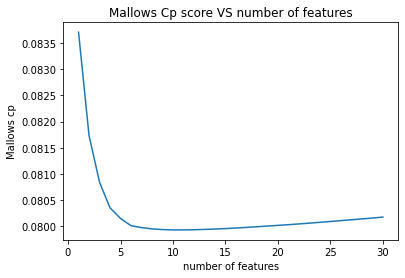

number of selected features by forward: 10
chosen features:
 ['info_page_duration', 'num_of_product_pages', 'product_page_duration', 'ExitRates', 'PageValues', 'Month', 'user_type', 'Weekend', 'A_s', 'device_3.0']


In [30]:
    
def apply_fw(data,res):
    features = []
    for i in res:
        features.append(data.columns[i])

    def fill_df(data):
        df = []
        for f in features:
            df.append(data[f])
        df = pd.DataFrame(data = df)
        df = df.T
        return df
    df = fill_df(data)
    return df

res = get_features(data)  
df = apply_fw(data, res)
df['purchase'] = data['purchase']

## 3. Modeling

In [31]:
X_sfs, y_sfs = df.values[:,:-1], df.values[:, -1]

In [32]:
##Model evaluation code - the output is ROC_AUC graph

def model_evaluation(df, model):
    X, y = df.values[:,:-1], df.values[:, -1]
    #to store tests on validation set 
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 1

    kf = KFold(n_splits=5, random_state=None, shuffle=True)
    for train, validation in kf.split(X):
        pred = model.fit(X[train],y[train]).predict_proba(X[validation])
        fpr, tpr, threshold = roc_curve(y[validation], pred[:,1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        aucs.append(auc(fpr, tpr))
        plt.plot(fpr, tpr, lw=2, alpha=0.4, label='ROC fold %d (AUC = %0.4f)' % (i, auc(fpr, tpr)))
        i+=1

    # Ploting
    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'r')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='b',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

For each model that we will run, we will make hyperparameter selection, present the chosen params and will present the ROC graph of the model 📈

In order to make feature selection we will split the data into test and validation 

In [33]:
X_t, X_v, y_t, y_v = train_test_split(X_sfs, y_sfs, test_size = 0.2, random_state= 42, shuffle=True)

Logistic regression model:

In [34]:
#Except from the hyperparameters we choose below, the rest are the default: 
# penalty = l2, dual=False, tol=0.0001, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None

lr = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']
c_values = [10, 1.0, 0.1, 0.01]
penalty = ['l1', 'l2', 'elasticnet']
grid = dict(solver=solvers,C=c_values, penalty=penalty)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_LR = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_search_LR.fit(X_t,y_t)
print('Best params are: ',grid_search_LR.best_params_)

Best params are:  {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


We will use the best params found by the gridSearchCV for the LR model.

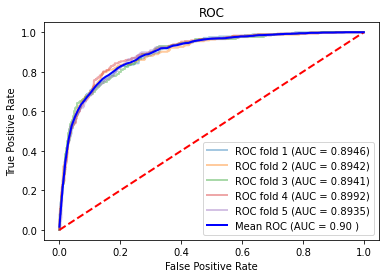

In [35]:
LR_model = LogisticRegression(C=10, penalty='l1', solver='saga')
model_evaluation(df, LR_model)

We can see that the logistic regression model accuracy is 89%! This is not a bad result 👌

Now we'll run KNN model:

In [36]:
#Except from the hyperparameters we choose below, the rest are the default: 
#algorithm='auto', leaf_size=30, p=2, metric_params=None, n_jobs=None)

neigh_model = KNeighborsClassifier()
n_neighbors = range(1, 10, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_knn = GridSearchCV(estimator=neigh_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_search_knn.fit(X_t,y_t)
print('Best params are: ',grid_search_knn.best_params_)


Best params are:  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}


We will use the best params found by the gridSearchCV for the KNN model.

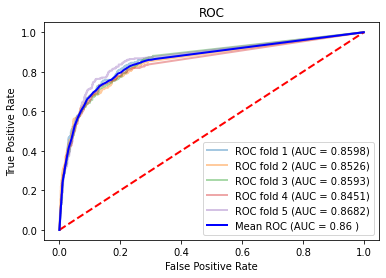

In [37]:
KNN_model = KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')
model_evaluation(df, KNN_model)

SVM model:

In [38]:
#Except from the hyperparameters we choose below, the rest are the default: 
#degree=3,coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
#class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None

clf = svm.SVC(probability=True)
kernel = ['poly', 'rbf', 'sigmoid']
C = [10, 1.0, 0.1]
gamma = ['scale', 'auto']
# define grid search
grid = dict(kernel=kernel ,gamma=gamma, C=C)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_svm = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_search_svm.fit(X_t, y_t)
# summarize results
print("Best params are: ", grid_search_svm.best_params_)

Best params are:  {'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}


We will use the best params found by the gridSearchCV for the SVM model.

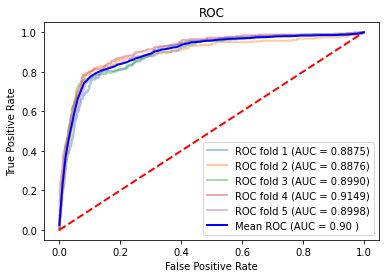

In [39]:
svm_model = svm.SVC(kernel='rbf', C = 1, gamma='auto', probability=True)
model_evaluation(df, svm_model)

Random forest:

In [40]:
#Except from the hyperparameters we choose below, the rest are the default: 
# criterion='gini', min_samples_leaf=1, min_weight_fraction_leaf=0.0,
# max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False,
# n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None

n_estimators = [10, 50, 200]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

rf = RandomForestClassifier(random_state=0)
gscv_rf = GridSearchCV(rf, random_grid, scoring='roc_auc')
gscv_rf.fit(X_t,y_t)
print('Best params are: ',gscv_rf.best_params_)

Best params are:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 200}


We will use the best params found by the gridSearchCV for the RF model.

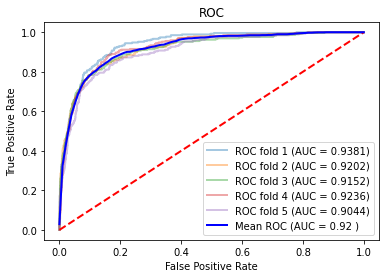

In [41]:

RF_model = RandomForestClassifier(n_estimators =200, max_features='auto' , max_depth=10 , min_samples_split=2)
model_evaluation(df, RF_model)

We got the best AUC results from the RandomForestClassifier model, this is the model we will want to use for the predictions later on. From this reason we will make the overfit check on this model:

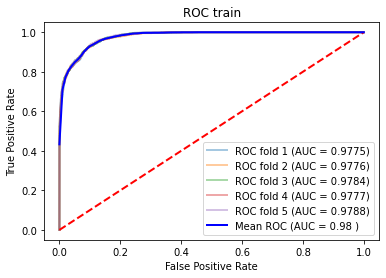

In [42]:
def rf_evaluation(df, model):

    X, y = df.values[:,:-1], df.values[:, -1]
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    j = 1
    kf = KFold(n_splits=5, random_state=None, shuffle=True)

    for train, validation in kf.split(X):
        pred = model.fit(X[train],y[train]).predict_proba(X[train])
        fpr, tpr, threshold = roc_curve(y[train], pred[:,1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        aucs.append(auc(fpr, tpr))
        plt.plot(fpr, tpr, lw=2, alpha=0.4, label='ROC fold %d (AUC = %0.4f)' % (j, auc(fpr, tpr)))
        j+=1
    
    # Ploting the test ROC 
    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'r')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='b',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC train')
    plt.legend(loc="lower right")
    plt.show()

rf_evaluation(df, RF_model)

## Overfitting
<br>Previously we got AUC score of 92% on the validation data with random forest classifier model. When we ran the model on the train data we got an AUC score of 98%. When we try to figure if our model is overfit we compare between the model performance on train and validation data sets and see that if the gap is big (train performance higher than test) it is a good indicator about an overfit. <br>Due the fact we didn't get a big gap between the performances - only 6%, we do not believe our model is overfit. 

## Confusion Matrix

Now we will demonstrate a confusion matrix on the best model that we got: the random forest. 

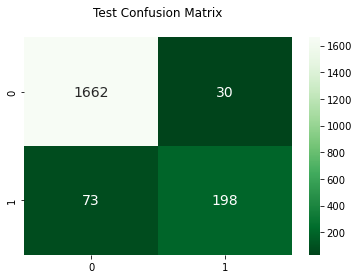

In [43]:
test_pred = RF_model.predict(X_v)
test_rf_cm = confusion_matrix(y_v, test_pred)
test_plot_mpl = sns.heatmap(test_rf_cm, annot=True, fmt='g', annot_kws={"size": 14},xticklabels = [0,1], yticklabels = [0,1], cmap='Greens_r')
test_plot_mpl.set_title('Test Confusion Matrix\n')
plt.show()

From the confusion matrix we ran on a validation dataset we have the following stats: 
<br>Accuracy = 0.94 - that means we are correct in 94% precents of the cases when we need to determine whether a costumer has purchased a product or not. 
<br>Precision = 0.74 - that means that in 74% of the cases we determined a costumer has purchased a product he actually did. 
<br>Sensitivity = 0.85 - that means that from the costumers who really purchased a product we predicted 85% correctly. 
<br>Specifity = 0.95 - that means that from the costumers who actually didn't buy the product we predicted 95% correctly. 

# Pipeline 🎉🎉

### Applying the process on the train data

We made built in functions so that we can apply the data processing efficiently in the pipeline

Train data preprocessing:

In [44]:
train = pd.read_csv("train.csv")
train = first_process(train)
train = A_process(train)
train = browser_process(train)
train = remove_outliers(train)
train = drop_process(train)

##means and medians used for filling NA's
B_mean = train['B'].mean()
num_inf_pg = train['num_of_info_pages'].mean()
inf_pg_dr = train['info_page_duration'].mean()
num_pr_pg = train['num_of_product_pages'].mean()
ex_rt = train['ExitRates'].mean()
holiday = train['closeness_to_holiday'].median()
device = train['device'].median()
region = train['Region'].median()
ad_pg = train['num_of_admin_pages'].median()
ad_pg_dr = train['admin_page_duration'].median()
pr_pg_dr = train['product_page_duration'].median()
pg_val = train['PageValues'].median()
## A by weights
A_dict = {3:'w',13:'w', 15:'w', 1:'av', 4:'av', 6:'av', 9:'av', 11:'av', 2:'s', 5:'s', 7:'s', 8:'s', 10:'s', 20:'s'}
train['A'] = train['A'].replace(A_dict)
train['A'] = train['A'].fillna(0)

train = fill_na(train)
train = dummies(train)
train = normalize(train)
ordered_cols = [x for x in data.columns if x not in['purchase']] + ['purchase']
train = train[ordered_cols]

Applying forward feature selection:

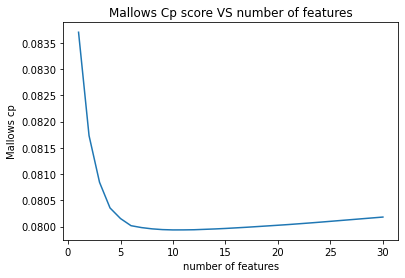

number of selected features by forward: 10
chosen features:
 ['info_page_duration', 'num_of_product_pages', 'product_page_duration', 'ExitRates', 'PageValues', 'Month', 'user_type', 'Weekend', 'A_s', 'device_3.0']


In [45]:
selected_features = get_features(train)
train_proc = apply_fw(train, selected_features)
train_proc['purchase'] = train['purchase']

Running the RandomForestClassifier model which is the model with the best performance we got:

In [46]:
X, y = train_proc.values[:,:-1], train_proc.values[:, -1]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state= 42, shuffle=True)

n_estimators = [10, 50, 200]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

rf = RandomForestClassifier(random_state=0)
gscv_rf = GridSearchCV(rf, random_grid, scoring='roc_auc')
gscv_rf.fit(X_train,y_train)
print('Best params are: ',gscv_rf.best_params_)

Best params are:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 50}


Model training:

In [47]:
#Except from the hyperparameters we choose below, the rest are the default: 
# criterion='gini', min_samples_leaf=1, min_weight_fraction_leaf=0.0,
# max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False,
# n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None

n_estimators = [10, 50, 200]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

rf = RandomForestClassifier(random_state=0)
gscv_rf = GridSearchCV(rf, random_grid, scoring='roc_auc')
gscv_rf.fit(X_t,y_t)
print('Best params are: ',gscv_rf.best_params_)

Best params are:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 200}


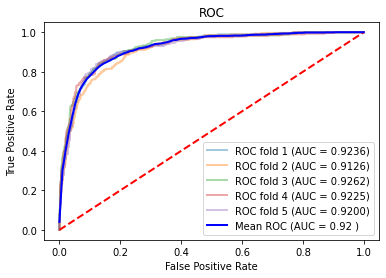

In [48]:
RF_model = RandomForestClassifier(n_estimators =200, max_features='auto' , max_depth=10 , min_samples_split=2)
model_evaluation(train_proc, RF_model)

### Finally, we can run our model on the test data 

Test data preprocessing: 

In [49]:
test = pd.read_csv("test.csv")
test = first_process(test)
test = A_process(test)
test = browser_process(test)
test = drop_process(test)
A_dict = {3:'w',13:'w', 15:'w', 1:'av', 4:'av', 6:'av', 9:'av', 11:'av', 2:'s', 5:'s', 7:'s', 8:'s', 10:'s', 20:'s'}
test['A'] = test['A'].replace(A_dict)
test['A'] = test['A'].fillna(0)
test = fill_na(test)
test = dummies(test)
test = normalize(test)

Feature selection:
<br>Due the fact that in order to make fw feature selection the algorythm requires X and y, and in the test data we have only X, we will use the selected feature list we have from the train data and apply it on the test:

In [50]:
test = apply_fw(test, selected_features)
X_test = test.values[:,:]

🤸 Make predictions and export it to csv file 🤸‍♂️

In [51]:
predictions = RF_model.predict_proba(X_test)

ids = pd.read_csv("test.csv")['id']
output=pd.DataFrame(data={"id":ids,"predict_prob":predictions[:,1]}) 

#This code is used for predictions export.
#TODO: change the path to save the csv file.
# output.to_csv(path_or_buf="C:/Users/bulga/Downloads/submission_31.csv",index=False,quoting=3,sep=',')